Name: Nguyễn Lâm Vĩnh Gia - ID: 2052074

# PCA EXERCISE

## Data set

In this context, we will use the Wine dataset consisting of 178 samples from each of three types of wine, with other 13 columns which represent some chemical characteristics of those wine samples. The objective of this exercise is prgramming the PCA algorithm, as well as implementing it to reduce the dimension of the Wine dataset for further execution.

- Firstly, we import the data from CSV file delete the first column of type of wine from the datafrane.

In [5]:
import pandas as pd
import numpy as np

file_path = r"C:\Studying Documents\Artificial intelligient\Exercise\PCA\wine.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Delete the first column of types of wine 
wines = df['Wine'].copy().values.tolist()
df.drop(['Wine'], axis = 1, inplace = True)
print(df.info())

# Get the columns of the dataset
cols = df.columns
feature_num = len(cols)

# Convert the data frame to numpy arrays
df = df.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic.acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Acl                   178 non-null    float64
 4   Mg                    178 non-null    int64  
 5   Phenols               178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid.phenols  178 non-null    float64
 8   Proanth               178 non-null    float64
 9   Color.int             178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD                    178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


- Visualize the correlation of the data to check whether it satisfies the assumption of colinearity and Gaussian distribution of the PCA algorithm

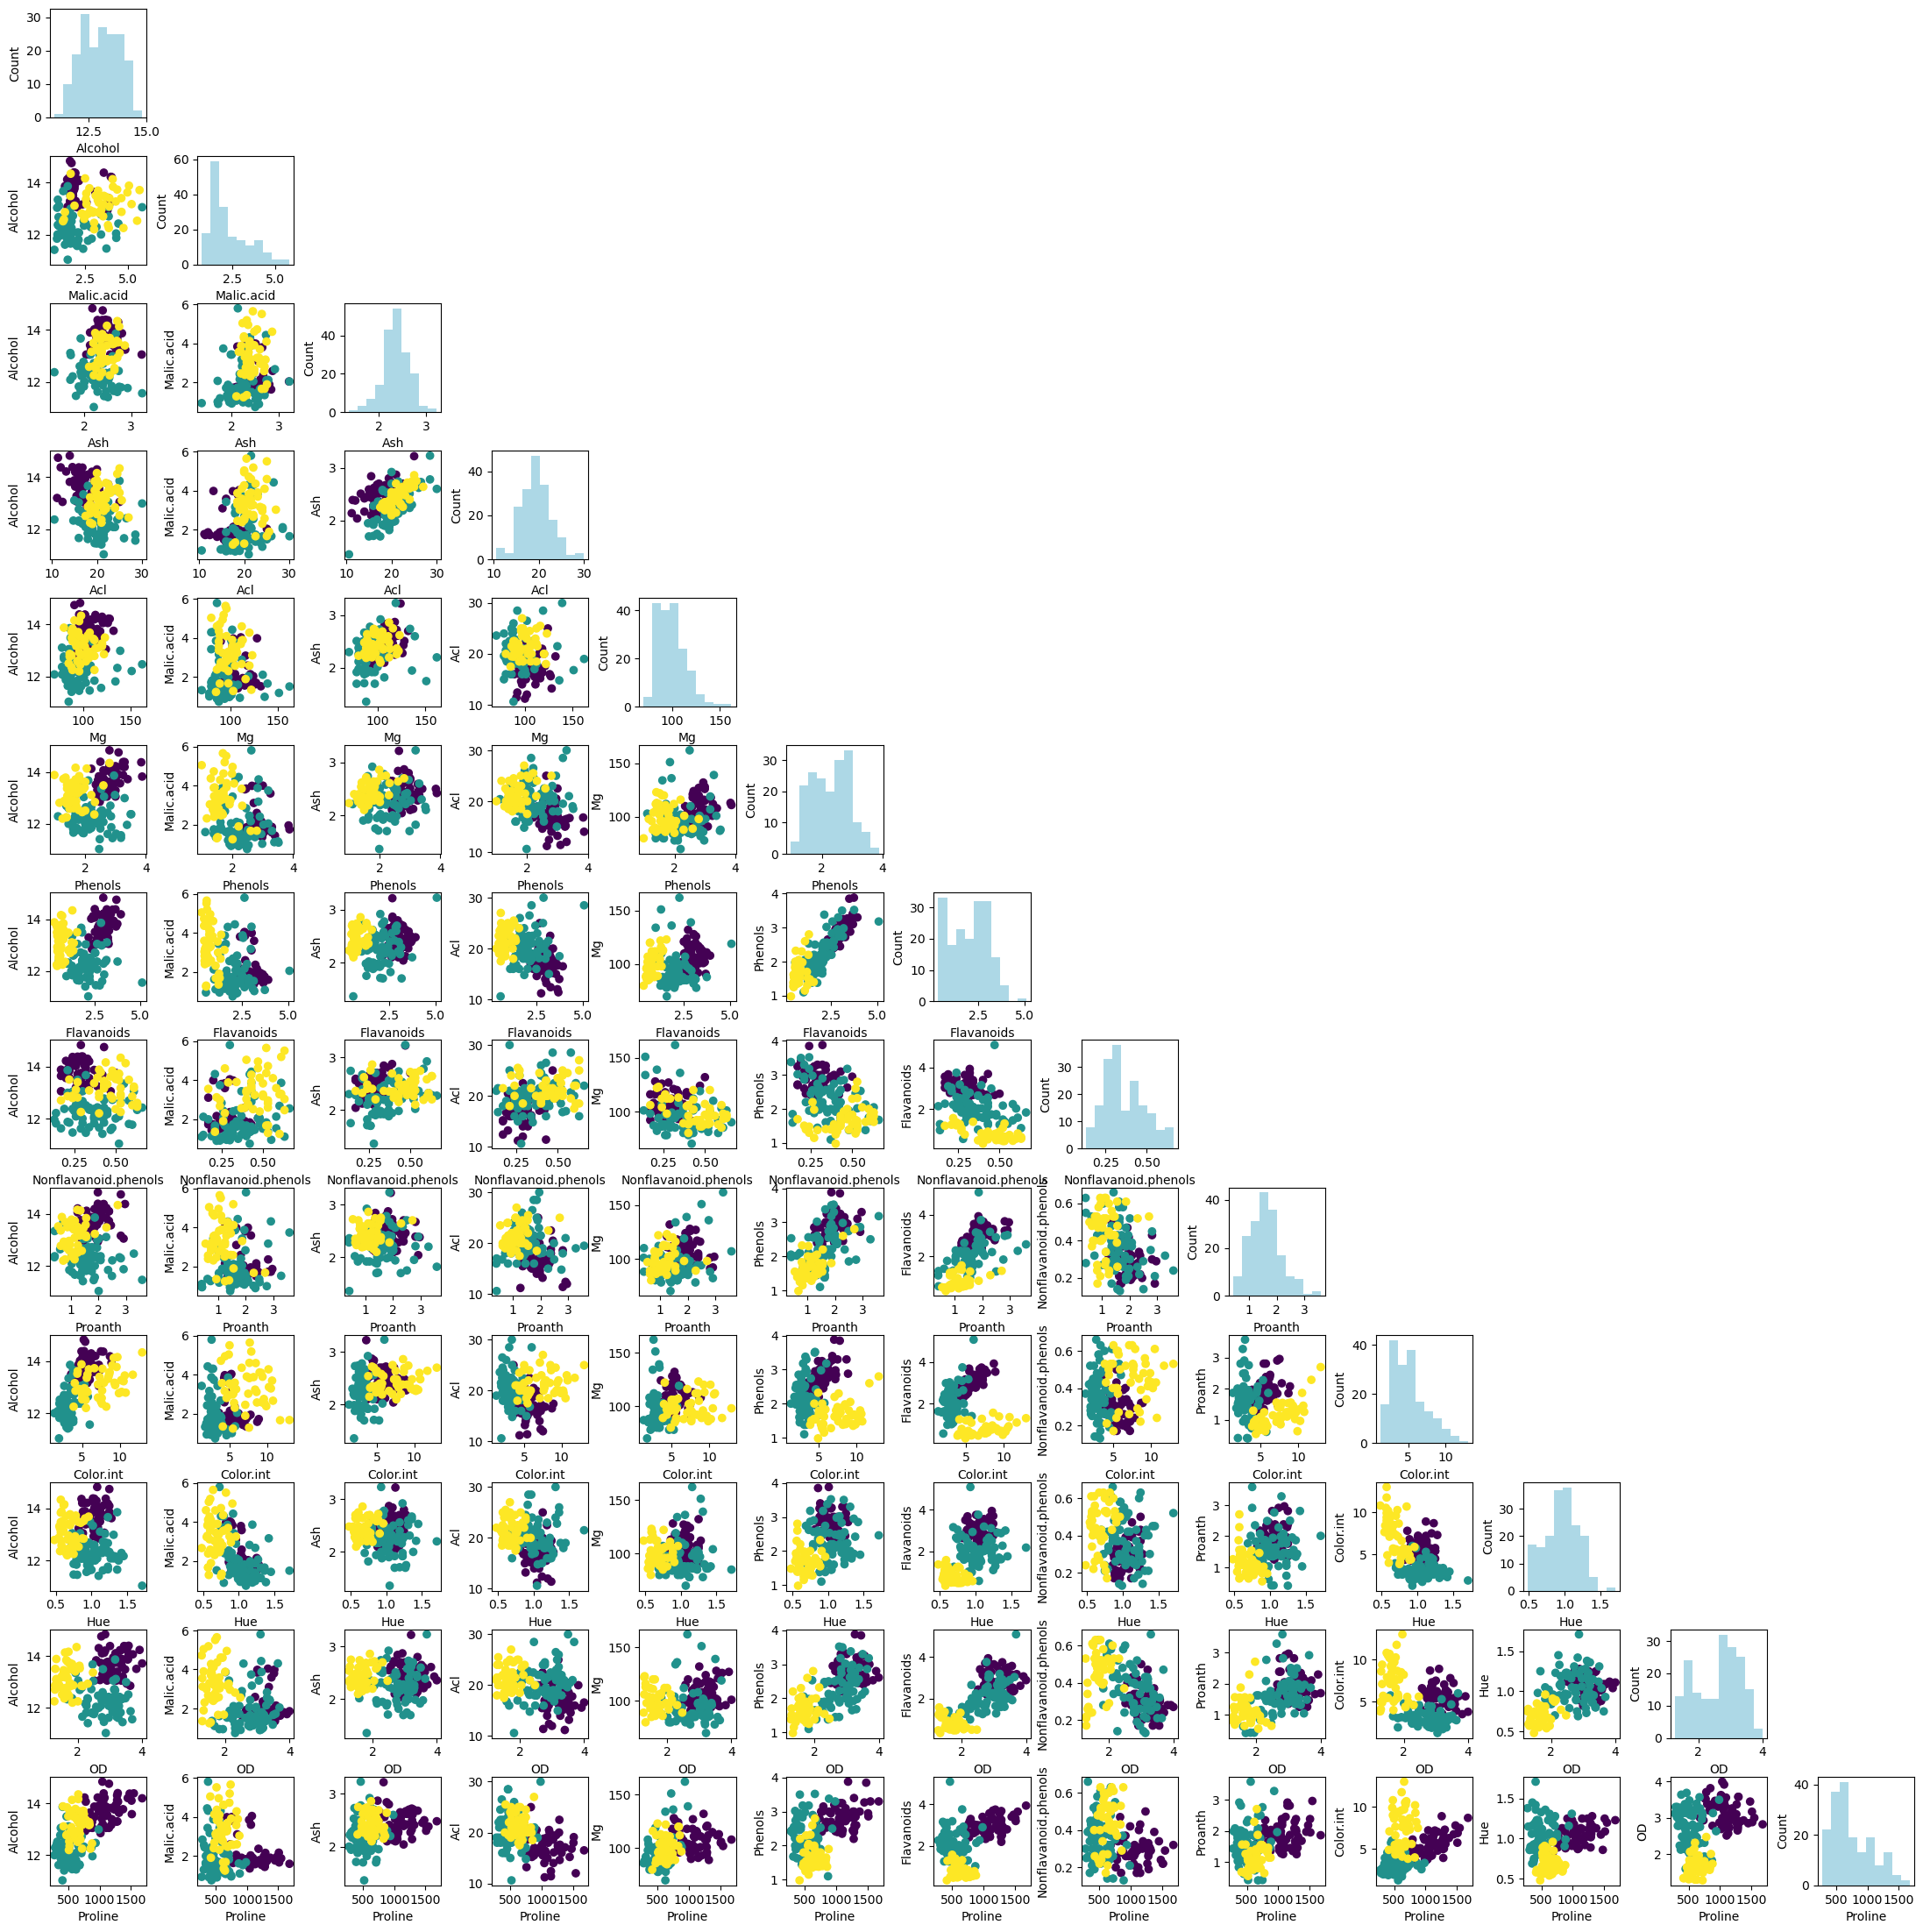

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = feature_num, ncols = feature_num, figsize = (22, 22))
fig.tight_layout()

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(df[:, j], df[:, i], c = wines)
    ax[j, i].set_xlabel(cols[j])
    ax[j, i].set_ylabel(cols[i])
    ax[i, j].set_axis_off()

for i in range(feature_num):
    ax[i, i].hist(df[:, i], color = 'lightblue')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(cols[i])


We can easily see that most of the data features obey the Gaussian distribution and their correlated is fairly linear, which means we can apply the PCA algorithm to reduce the dimension of this dataset.

## PCA algorithm 

Below is the step-by-step guide to programming the PCA algorithm using covariance method.

### Step 1: Standardize the data
- We will apply the normal standardization for the data to ensure the features ensure the symmetric and centralized of the data columns, as well as speed up the convergence of the algorithm.

In [6]:
# Function to standardize the data 
def standardizeData(data_col):
    return (data_col - np.mean(data_col, axis = 0))/np.std(data_col, axis = 0)

# Apply it onto the dataset
for col in range(df.shape[1]):
    df[:,col] = standardizeData(df[:,col])

### Step 2: Find the covariance matrix

In [7]:
cov_mat = np.cov(df.T)
print(cov_mat)

[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -0.413328

### Step 3: Find the eigenvalues and eigenvectors of the covariance matrix

In [8]:
eig_vals, eig_vects = np.linalg.eig(cov_mat)
eig_vects = eig_vects.T

### Step 4: Rearrange the eigenvalues and eigenvectors from the largest one to the smallest one

In [9]:
# Index the eigenvalues in descending order
idx = eig_vals.argsort()[::-1]
# Sort the eigenvalues and eigenvectors
eig_vals = eig_vals[idx]
eig_vects = eig_vects[idx]

print("Eigenvalues\n", eig_vals)
print("Eigenvectors\n", eig_vects)

Eigenvalues
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
Eigenvectors
 [[-0.1443294   0.24518758  0.00205106  0.23932041 -0.14199204 -0.39466085
  -0.4229343   0.2985331  -0.31342949  0.0886167  -0.29671456 -0.37616741
  -0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [ 0.0178563  -0.53689028  0.21417556 -0.06085941  0.35179658 -0.19806835
  -0.15229479  0.20330102 -0.39905653 -0.06592568  0.42777141 -0.18412074
   0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [ 0.213538

### Step 5: Choose the number of dimension to be kept

In this step, normally we will select the dimension to kept from 2-3. However, we must select the number of k dimension, so that it must attribute enough variance to the principle components, which is depended on our purpose, but we will choose 85% in this context.

Cumulative explained variance: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


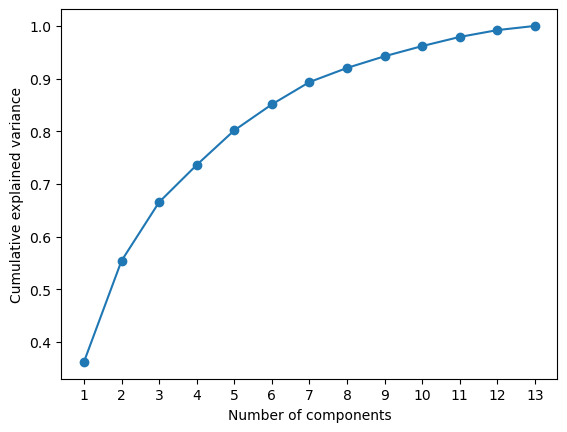

The number of principal components explaining at least 85% of the variance is 6


In [11]:
# Get the accumulative variance 
explained_var = np.cumsum(eig_vals) / np.sum(eig_vals)
print('Cumulative explained variance: {}'.format(explained_var))

plt.plot(np.arange(1,feature_num+1), explained_var, '-o')
plt.xticks(np.arange(1,feature_num+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

# Get the number of principle components that explain at least 85% of the variance
n_components = np.argmax(explained_var >= 0.85) + 1
print("The number of principal components explaining at least 85% of the variance is", n_components)

### Step 6: Project the data

In [12]:
# Get the projection matrix
proj_mat = eig_vects[:,:n_components]

df_proj = df.dot(proj_mat)
print(df_proj.shape)

(178, 6)


## OOP version of the PCA algorithm

Combine the above step, we will create a class of PCA for easier future utilization of this algorithm

In [29]:
class PCA:
    # Constructor of the class
    def __init__(self, variance_perc):
        self.__variance_perc = variance_perc

    # Function to standarize the initial data
    def standardizeCol(self, data_col):
        return (data_col - np.mean(data_col, axis = 0))/np.std(data_col, axis = 0)
    
    # Function to standarize the whole dataframe
    def standardizeData(self, df):
        self.__df = df.copy()
        # Standardize all the features of the dataframe
        for col in range(self.__df.shape[1]):
            self.__df[:,col] = self.standardizeCol(self.__df[:,col]) 

    # Function to get the projecttion matrix
    def projMat(self):
        # Get the covariance matrix and eigenvalues, eigenvectors
        cov_mat = np.cov(self.__df.T)
        eig_vals, eig_vects = np.linalg.eig(cov_mat) 

        # Index the eigenvalues in descending order
        idx = eig_vals.argsort()[::-1]
        # Sort the eigenvalues and eigenvectors
        eig_vals = eig_vals[idx]
        eig_vects = eig_vects[idx]

        self.__explained_var = np.cumsum(eig_vals) / np.sum(eig_vals)
        self.n_components = np.argmax(self.__explained_var >= self.__variance_perc) + 1

        return eig_vects[:,:self.n_components]
    
    def dataProj(self, df):
        df = df.copy()
        self.standardizeData(df)
        proj_mat = self.projMat()
        df_proj = self.__df.dot(proj_mat)
        return df_proj

if __name__ == "__main__":
    file_path = r"C:\Studying Documents\Artificial intelligient\Exercise\PCA\wine.csv"
    df = pd.read_csv(file_path, encoding='utf-8')
    # Delete the first column of types of wine 
    wines = df['Wine'].copy().values.tolist()
    df.drop(['Wine'], axis = 1, inplace = True)
    # Convert the data frame to numpy arrays
    df = df.to_numpy()

    pca = PCA(0.85)
    proj_data = pca.dataProj(df)
    print(proj_data.shape)

(178, 6)


Thus, we have successfully reduce the dimension of the Wine dataset from 13 features to 6 features and still be capable of explaining 85% of the variance.

## Classification 

After reducing the dimension of the dataset, we will perform KNN classification model on the new data. In this part, I will reuse the KNN algorithm that I developed during the last class.

In [22]:
from math import sqrt

class KNN:
    # Initiate the k value for the class and the number of feature of each class
    def __init__(self, k):
        self.k = k

    # Function to calculate the Euclidean distance between the new point and the data points
    def euclideanDistance(self, new_point, data_point):
        dist = 0.0
        for i in range(len(data_point) - 1):
            dist += (new_point[i] - data_point[i]) ** 2
        return sqrt(dist)
    
    # Function to find the k nearest neighbour
    def getKNeighbour(self, new_point, data_frame):
        distances = []
        # Get the list of distances
        for data in data_frame:
            dist = self.euclideanDistance(new_point, data)
            distances.append((dist, data[-1]))
        # Get k smallest distance
        return sorted(distances)[:self.k]
    
    # Function to classified the new point based on the dataset
    def predictClassify(self, new_point, data_frame):
        # Get k nearest neighbours
        k_neighbours = self.getKNeighbour(new_point, data_frame)
        # Get the count
        class_output = [neighbour[-1] for neighbour in k_neighbours]
        predict_class = max(set(class_output), key=class_output.count)
        return predict_class

Insert the data of wine types to the last column to prepare for the classification 

In [30]:
test_data_1 = proj_data[13,:]
test_data_2 = proj_data[67,:]
proj_data = np.insert(proj_data, 6, wines, axis=1)

Perform the KNN classification algorithm with the choice of k = 5 as there are three types of wines

In [31]:
knn = KNN(5)
print("The group of wine of the data 1 is", knn.predictClassify(test_data_1, proj_data))
print("The group of wine of the data 2 is", knn.predictClassify(test_data_2, proj_data))

The group of wine of the data 1 is 1.0
The group of wine of the data 2 is 2.0
